In [2]:
import os
# import h5py

import xarray as xr
import netCDF4 as nc4
import pandas as pd
import numpy as np
#import rpy2.robjects as robjects 
from scipy.optimize import curve_fit
import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import glob
# from sklearn.metrics import r2_score
from pathlib import Path
import scipy.interpolate as spi
import math
from mpmath import sec


# Calculate AK

In [5]:
months = ['01','02','03','04','05','06','07','08','09','10','11','12',]

# monID = '12'
for mo in months:
    
    lis = []
    
    for path in Path('/media/dell/Book/HCHO_GEMS_NC/').rglob('*2021'+mo+'*.nc'):
        lis.append(path)
    print(mo+"!"+str(len(lis)))
    count = 0
    for ncPath in lis:
        if (count==0):
            nc_file = xr.open_dataset(ncPath, engine="netcdf4", group = 'Data Fields')
            corr = xr.open_dataset(ncPath, engine="netcdf4", group = 'Geolocation Fields')
            nc_file.coords["lon"] = corr.Longitude
            nc_file.coords["lat"] = corr.Latitude
            nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
            nc_file.coords["cf"] = nc_file.AMFCloudFraction
            nc_file.coords["sza"] = corr.SolarZenithAngle
    #         nc_file.coords["vza"] = corr.ViewingZenithAngle
            df = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()
            df = df.reset_index().dropna()
            df = df[df['qa']==0]
            df = df[df['cf']<0.3]
            df = df[df['sza']<60]
            df = df[df['lat']<55]
            df = df[df['lat']>-10]
            df = df[df['lon']<145]
            df = df[df['lon']>65]
            df['hour'] = str(ncPath)[61:63]

            lonX = []
            latX = []
            for lon in df['lon']:
                lonX.append(round((lon-60)/0.625)*0.625+60)
            for lat in df['lat']:
                latX.append(round((lat+11)/0.5)*0.5-11)
            df['lonX'] = lonX
            df['latX'] = latX

    #         df = df[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour','sza','vza']].groupby(['layer','lonX','latX','hour']).mean()
            df = df[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour']].groupby(['layer','lonX','latX','hour']).mean()

    #         AMFg = []
    #         for i in range(len(df['ScatteringWeight'])):
    #             AMFg.append(sec(math.radians(df.iloc[i]['sza'])) + sec(math.radians(df.iloc[i]['vza'])))
    #         df['AMFg'] = AMFg
    #         df['AirMassFactor']=df['AirMassFactor']/df['AMFg']
            df['AK'] = df['ScatteringWeight'] / df['AirMassFactor']
            df = df[['AK']].reset_index()
        else:
            try:
                nc_file = xr.open_dataset(ncPath, engine="netcdf4", group = 'Data Fields')
                corr = xr.open_dataset(ncPath, engine="netcdf4", group = 'Geolocation Fields')
                nc_file.coords["lon"] = corr.Longitude
                nc_file.coords["lat"] = corr.Latitude
                nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
                nc_file.coords["cf"] = nc_file.AMFCloudFraction
                nc_file.coords["sza"] = corr.SolarZenithAngle
    #             nc_file.coords["vza"] = corr.ViewingZenithAngle
                dfT = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()
                dfT = dfT.reset_index().dropna()
                dfT = dfT[dfT['qa']==0]
                dfT = dfT[dfT['cf']<0.3]
                dfT = dfT[dfT['sza']<60]
                dfT = dfT[dfT['lat']<55]
                dfT = dfT[dfT['lat']>-10]
                dfT = dfT[dfT['lon']<145]
                dfT = dfT[dfT['lon']>65]
                dfT['hour'] = str(ncPath)[61:63]

                lonX = []
                latX = []
                for lon in dfT['lon']:
                    lonX.append(round((lon-60)/0.625)*0.625+60)
                for lat in dfT['lat']:
                    latX.append(round((lat+11)/0.5)*0.5-11)
                dfT['lonX'] = lonX
                dfT['latX'] = latX

                dfT = dfT[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour']].groupby(['layer','lonX','latX','hour']).mean()

    #             AMFg = []
    #             for i in range(len(dfT['ScatteringWeight'])):
    #                 AMFg.append(sec(math.radians(dfT.iloc[i]['sza'])) + sec(math.radians(dfT.iloc[i]['vza'])))
    #             dfT['AMFg'] = AMFg
    #             dfT['AirMassFactor']=dfT['AirMassFactor']/dfT['AMFg']
                dfT['AK'] = dfT['ScatteringWeight'] / dfT['AirMassFactor']
                dfT = dfT[['AK']].reset_index()

                df = pd.concat([df,dfT])
            except:
                print(ncPath)
        count = count + 1
        print(count)
        
        df2 = df.reset_index()
        df2 = df2.groupby(['layer','lonX','latX','hour']).mean()

        df2 = df2.reset_index()
        df2.to_pickle('../GEMS_AK/GEMS_AK_2021' + mo)

04!300
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [3]:
AKlis = []
    
for path in Path('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK').rglob('*'):
    AKlis.append(path)
AKlis

[PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202101'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202102'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202103'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202105'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202106'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202107'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202108'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202109'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202110'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202111'),
 PosixPath('/media/dell/Elements/HCHO_GEMS_V2/GEMS_AK/GEMS_AK_202112')]

Text(0, 0.5, 'Layer')

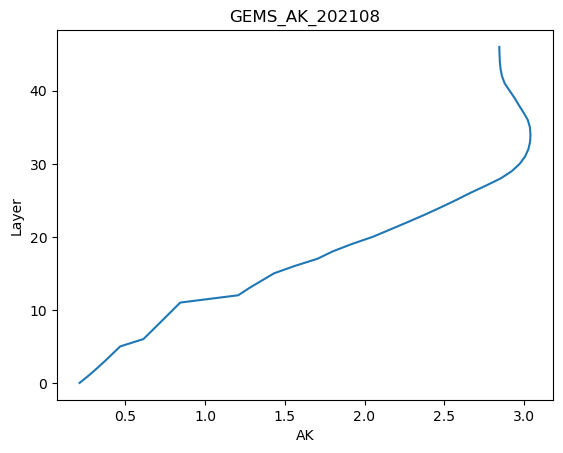

In [24]:
i = 6
ak = pd.read_pickle(AKlis[i])
ak = ak[(ak['lonX']==117.5)&(ak['latX']==40)&(ak['hour']=='02')]
plt.plot(ak['AK'], ak['layer'])
plt.title(str(AKlis[i])[-14:])
plt.xlabel('AK')
plt.ylabel('Layer')
# ak

In [3]:
lis[0]

PosixPath('/media/dell/Book/HCHO_GEMS_NC/202112/01/GK2_GEMS_L2_20211201_0045_HCHO_HE_DPRO_ORI.nc')

In [4]:
str(lis[0])[61:63]

'00'

In [5]:
lis[:3]

[PosixPath('/media/dell/Book/HCHO_GEMS_NC/202112/01/GK2_GEMS_L2_20211201_0045_HCHO_HE_DPRO_ORI.nc'),
 PosixPath('/media/dell/Book/HCHO_GEMS_NC/202112/01/GK2_GEMS_L2_20211201_0145_HCHO_HK_DPRO_ORI.nc'),
 PosixPath('/media/dell/Book/HCHO_GEMS_NC/202112/01/GK2_GEMS_L2_20211201_0245_HCHO_FC_DPRO_ORI.nc')]

In [13]:
nc_file = xr.open_dataset(lis[0], engine="netcdf4", group = 'Data Fields')
corr = xr.open_dataset(lis[0], engine="netcdf4", group = 'Geolocation Fields')
nc_file.coords["lon"] = corr.Longitude
nc_file.coords["lat"] = corr.Latitude
# nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
# nc_file.coords["cf"] = nc_file.AMFCloudFraction
nc_file.coords["sza"] = corr.SolarZenithAngle
nc_file.coords["vza"] = corr.ViewingZenithAngle
df = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()
df = df.reset_index().dropna()
df = df[df['lat']<55]
df = df[df['lat']>-10]
df = df[df['lon']<145]
df = df[df['lon']>65]
df['hour'] = str(lis[0])[61:63]

lonX = []
latX = []
for lon in df['lon']:
    lonX.append(round((lon-60)/0.625)*0.625+60)
for lat in df['lat']:
    latX.append(round((lat+11)/0.5)*0.5-11)
df['lonX'] = lonX
df['latX'] = latX

df = df[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour','sza','vza']].groupby(['layer','lonX','latX','hour']).mean()

#         df['Month'] = str(ncPath)[10:12]
#         df['Hour'] = str(ncPath)[37:39]
#         df['Month'] = str(ncPath)[34:36]
#         df['Hour'] = str(ncPath)[61:63]
AMFg = []
for i in range(len(df['ScatteringWeight'])):
    AMFg.append(sec(math.radians(df.iloc[i]['sza'])) + sec(math.radians(df.iloc[i]['vza'])))
df['AMFg'] = AMFg
df['AirMassFactor']=df['AirMassFactor']/df['AMFg']
df['AK'] = df['ScatteringWeight'] / df['AirMassFactor']
df = df[['AK']].reset_index()
df

# 
# 



,layer,lonX,latX,hour,AK
0,0,121.875,43.0,00,0.0
1,0,121.875,43.5,00,0.0
2,0,121.875,44.0,00,0.0
3,0,121.875,44.5,00,0.00183141194226441
4,0,121.875,45.0,00,0.139801814282281
...,...,...,...,...,...
173143,46,145.000,44.0,00,29.2361100478053
173144,46,145.000,44.5,00,40.6124250953375
173145,46,145.000,45.0,00,43.2158359599995
173146,46,145.000,45.5,00,26.8351668349757


In [ ]:
count = 0
for ncPath in lis:
    if (count==0):
        nc_file = xr.open_dataset(ncPath, engine="netcdf4", group = 'Data Fields')
        corr = xr.open_dataset(ncPath, engine="netcdf4", group = 'Geolocation Fields')
        nc_file.coords["lon"] = corr.Longitude
        nc_file.coords["lat"] = corr.Latitude
        nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
        nc_file.coords["cf"] = nc_file.AMFCloudFraction
        nc_file.coords["sza"] = corr.SolarZenithAngle
#         nc_file.coords["vza"] = corr.ViewingZenithAngle
        df = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()
        df = df.reset_index().dropna()
        df = df[df['qa']==0]
        df = df[df['cf']<0.3]
        df = df[df['sza']<60]
        df = df[df['lat']<55]
        df = df[df['lat']>-10]
        df = df[df['lon']<145]
        df = df[df['lon']>65]
        df['hour'] = str(ncPath)[61:63]

        lonX = []
        latX = []
        for lon in df['lon']:
            lonX.append(round((lon-60)/0.625)*0.625+60)
        for lat in df['lat']:
            latX.append(round((lat+11)/0.5)*0.5-11)
        df['lonX'] = lonX
        df['latX'] = latX

#         df = df[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour','sza','vza']].groupby(['layer','lonX','latX','hour']).mean()
        df = df[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour']].groupby(['layer','lonX','latX','hour']).mean()

#         AMFg = []
#         for i in range(len(df['ScatteringWeight'])):
#             AMFg.append(sec(math.radians(df.iloc[i]['sza'])) + sec(math.radians(df.iloc[i]['vza'])))
#         df['AMFg'] = AMFg
#         df['AirMassFactor']=df['AirMassFactor']/df['AMFg']
        df['AK'] = df['ScatteringWeight'] / df['AirMassFactor']
        df = df[['AK']].reset_index()
    else:
        try:
            nc_file = xr.open_dataset(ncPath, engine="netcdf4", group = 'Data Fields')
            corr = xr.open_dataset(ncPath, engine="netcdf4", group = 'Geolocation Fields')
            nc_file.coords["lon"] = corr.Longitude
            nc_file.coords["lat"] = corr.Latitude
            nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
            nc_file.coords["cf"] = nc_file.AMFCloudFraction
            nc_file.coords["sza"] = corr.SolarZenithAngle
#             nc_file.coords["vza"] = corr.ViewingZenithAngle
            dfT = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()
            dfT = dfT.reset_index().dropna()
            dfT = dfT[dfT['qa']==0]
            dfT = dfT[dfT['cf']<0.3]
            dfT = dfT[dfT['sza']<60]
            dfT = dfT[dfT['lat']<55]
            dfT = dfT[dfT['lat']>-10]
            dfT = dfT[dfT['lon']<145]
            dfT = dfT[dfT['lon']>65]
            dfT['hour'] = str(ncPath)[61:63]

            lonX = []
            latX = []
            for lon in dfT['lon']:
                lonX.append(round((lon-60)/0.625)*0.625+60)
            for lat in dfT['lat']:
                latX.append(round((lat+11)/0.5)*0.5-11)
            dfT['lonX'] = lonX
            dfT['latX'] = latX

            dfT = dfT[['layer','ScatteringWeight','AirMassFactor','lonX','latX','hour']].groupby(['layer','lonX','latX','hour']).mean()

#             AMFg = []
#             for i in range(len(dfT['ScatteringWeight'])):
#                 AMFg.append(sec(math.radians(dfT.iloc[i]['sza'])) + sec(math.radians(dfT.iloc[i]['vza'])))
#             dfT['AMFg'] = AMFg
#             dfT['AirMassFactor']=dfT['AirMassFactor']/dfT['AMFg']
            dfT['AK'] = dfT['ScatteringWeight'] / dfT['AirMassFactor']
            dfT = dfT[['AK']].reset_index()
            
            df = pd.concat([df,dfT])
        except:
            print(ncPath)
    count = count + 1
    print(count)

In [5]:
df

,layer,lonX,latX,hour,AK
0,0,123.750,-5.0,00,0.267841
1,0,123.750,-3.5,00,0.229221
2,0,123.750,-3.0,00,0.239456
3,0,123.750,-1.5,00,0.282268
4,0,123.750,-1.0,00,0.253867
...,...,...,...,...,...
122665,46,141.250,36.0,01,2.665011
122666,46,141.250,36.5,01,2.665406
122667,46,141.250,37.0,01,2.688309
122668,46,141.875,36.5,01,2.667304


In [6]:
df2 = df.reset_index()
df2 = df2.groupby(['layer','lonX','latX','hour']).mean()
# df2 = df2.groupby(['Layer','lonX','latX','Month']).mean()

df2 = df2.reset_index()
df2

,layer,lonX,latX,hour,index,AK
0,0,66.250,29.0,04,0.000000,0.084028
1,0,66.250,29.5,04,1.000000,0.084291
2,0,66.875,29.0,04,1.500000,0.081761
3,0,66.875,29.5,04,2.333333,0.085296
4,0,67.500,29.5,04,3.000000,0.091074
...,...,...,...,...,...,...
1345887,46,145.000,33.0,00,72378.000000,2.277318
1345888,46,145.000,33.5,00,98133.000000,2.197340
1345889,46,145.000,34.0,00,85256.500000,2.257464
1345890,46,145.000,34.5,00,86854.500000,2.187142


In [7]:
df2.to_pickle('../GEMS_AK/GEMS_AK_2021' + monID)

In [ ]:
count = 0
for ncPath in lis[:]:
    if (count==0):
        nc_file = xr.open_dataset(ncPath, engine="netcdf4", group = 'Data Fields')
        corr = xr.open_dataset(ncPath, engine="netcdf4", group = 'Geolocation Fields')
        nc_file.coords["lon"] = corr.Longitude
        nc_file.coords["lat"] = corr.Latitude
        nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
        nc_file.coords["cf"] = nc_file.AMFCloudFraction
        nc_file.coords["sza"] = corr.SolarZenithAngle
        nc_file.coords["vza"] = corr.ViewingZenithAngle
        df = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()
#         df['Month'] = str(ncPath)[10:12]
#         df['Hour'] = str(ncPath)[37:39]
#         df['Month'] = str(ncPath)[34:36]
#         df['Hour'] = str(ncPath)[61:63]
        df = df.reset_index().dropna()
        AMFg = []
        for i in range(len(df['Layer'])):
            AMFg.append(sec(math.radians(df.iloc[i]['sza'])) + sec(math.radians(df.iloc[i]['vza'])))
        df['AMFg'] = AMFg
        df['ScatteringWeight']=df['ScatteringWeight']/df['AMFg']
        df['AK'] = df['ScatteringWeight'] / df['AirMassFactor']
        
        lonX = []
        latX = []
        for lon in df['lon']:
            lonX.append(round((lon-60)/0.625)*0.625+60)
        for lat in df['lat']:
            latX.append(round((lat+11)/0.5)*0.5-11)
        df['lonX'] = lonX
        df['latX'] = latX
        
        df = df[['layer','AK','lonX','latX']].groupby(['layer','lonX','latX']).mean()
#         df = df[['layer','ScatteringWeight','lonX','latX','Month']].groupby(['layer','lonX','latX','Month']).mean()
        
    else:
        try:
            nc_file = xr.open_dataset(ncPath, engine="netcdf4", group = 'Data Fields')
            corr = xr.open_dataset(ncPath, engine="netcdf4", group = 'Geolocation Fields')
            nc_file.coords["lon"] = corr.Longitude
            nc_file.coords["lat"] = corr.Latitude
            nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
            nc_file.coords["cf"] = nc_file.AMFCloudFraction
            nc_file.coords["sza"] = corr.SolarZenithAngle
            nc_file.coords["vza"] = corr.ViewingZenithAngle
            dfT = nc_file[['Layer','ScatteringWeight','AirMassFactor']].to_dataframe()

    #         dfT['Month'] = str(ncPath)[34:36]
    #         dfT['Hour'] = str(ncPath)[61:63]
    #         dfT['Month'] = str(ncPath)[10:12]
    #         dfT['Hour'] = str(ncPath)[37:39]
            dfT = dfT.reset_index().dropna()
            AMFg = []
            for i in range(len(dfT['Layer'])):
                AMFg.append(sec(math.radians(dfT.iloc[i]['sza'])) + sec(math.radians(dfT.iloc[i]['vza'])))
            dfT['AMFg'] = AMFg
            dfT['ScatteringWeight']=dfT['ScatteringWeight']/dfT['AMFg']

            dfT['AK'] = dfT['ScatteringWeight'] / dfT['AirMassFactor']
            lonX = []
            latX = []
            for lon in dfT['lon']:
                lonX.append(round((lon-60)/0.625)*0.625+60)
            for lat in dfT['lat']:
                latX.append(round((lat+11)/0.5)*0.5-11)
            dfT['lonX'] = lonX
            dfT['latX'] = latX

            dfT = dfT[['layer','AK','lonX','latX']].groupby(['layer','lonX','latX']).mean()

            df = pd.concat([df,dfT])
        except:
            print(ncPath)
    count = count + 1
    print(count)

1
2
3
4


In [5]:
df

AK
layer lonX    latX          
0     121.875 43.0  0.000000
              43.5  0.000000
              44.0  0.000000
              44.5  0.000356
              45.0  0.027559
...                      ...
46    133.125 43.5  4.284983
              44.0  3.529529
              44.5  3.666060
              45.0  3.369200
              45.5  5.138216

[65020411 rows x 1 columns]

In [15]:
df.to_pickle('../GEMS_AK/GEMS_AK_2021' + monID)

In [92]:
df2 = df.reset_index()
df2 = df2.groupby(['layer','lonX','latX','Month']).mean()
# df2 = df2.groupby(['Layer','lonX','latX','Month']).mean()

df2 = df2.reset_index()
df2

,layer,lonX,latX,Month,ScatteringWeight
0,0,64.375,43.5,05,0.044069
1,0,64.375,44.0,05,0.044395
2,0,65.000,43.5,05,0.048179
3,0,65.000,44.0,05,0.047739
4,0,65.000,44.5,05,0.050274
...,...,...,...,...,...
450490,46,143.750,44.0,05,2.844352
450491,46,143.750,44.5,05,2.867356
450492,46,143.750,45.0,05,2.894573
450493,46,143.750,45.5,05,2.922669


In [80]:
temp = df2[(df2['lonX']==69.375) & (df2['latX']==48)]
# temp = t
temp

,layer,lonX,latX,Month,ScatteringWeight
99,0,69.375,48.0,05,0.061416
9684,1,69.375,48.0,05,0.081110
19269,2,69.375,48.0,05,0.099965
28854,3,69.375,48.0,05,0.118520
38439,4,69.375,48.0,05,0.137100
48024,5,69.375,48.0,05,0.155929
57609,6,69.375,48.0,05,0.175153
67194,7,69.375,48.0,05,0.194871
76779,8,69.375,48.0,05,0.215181
86364,9,69.375,48.0,05,0.236147


Text(0, 0.5, 'Atmospheric Pressure (hPa)')

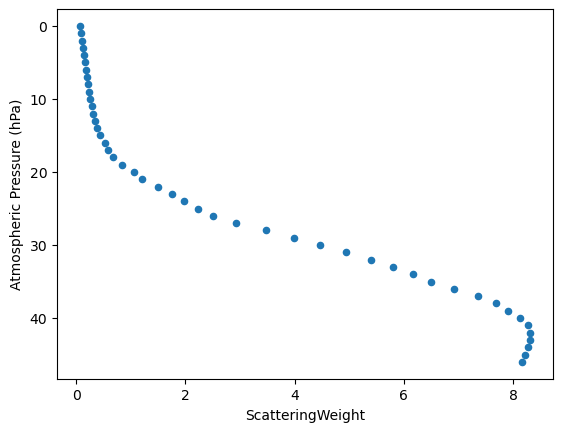

In [81]:
temp.plot(x='ScatteringWeight',y='layer',kind='scatter')
plt.gca().invert_yaxis()
plt.ylabel('Atmospheric Pressure (hPa)')

# Read GC Monthly 

In [82]:
monID = 12
GClis = []
for path in Path('../OutputDirGFED').rglob('*Conc.2021' + str(monID) + '*.nc4'):
    GClis.append(path)
print(len(GClis))

31


In [91]:
# Read all daily GC and save them into gcGf
count = 0
for DailyGC in GClis:
    metPath = str(DailyGC).replace('SpeciesConc','StateMet')

    if (count == 0):
        gc = xr.open_dataset(DailyGC, engine="netcdf4")
        tm = []
        for i in gc.time:
            if int(str(i)[47:49]) in [23, 0, 1, 2, 3, 4, 5, 6, 7, 8]:
                tm.append(str(i)[36:65])
        # gc['SpeciesConcMND_CH2O']
        met = xr.open_dataset(metPath, engine="netcdf4")['Met_BXHEIGHT']
        gc['Met_BXHEIGHT'] = met
        gc['VCD'] = gc['Met_BXHEIGHT']*gc['SpeciesConcMND_CH2O']*100
        # gcDf = gc.sel(time=tm)['SpeciesConcMND_CH2O', 'Met_BXHEIGHT']
        # .to_dataframe()
        gcDf = gc.sel(time=tm)[['VCD','lev']].to_dataframe().reset_index().groupby(['time', 'lon','lat','lev']).sum().reset_index()
        # gcDf
#         tm = gcDf['time'].unique()
#         tm = list(tm)
#         tm2 = []
#         for a in tm:
#             tm2.append(str(a))        
    else:
        gcT = xr.open_dataset(DailyGC, engine="netcdf4")
        tm = []
        for i in gcT.time:
            if int(str(i)[47:49]) in [23, 0, 1, 2, 3, 4, 5, 6, 7, 8]:
                tm.append(str(i)[36:65])
        # gc['SpeciesConcMND_CH2O']
        try:
            metT = xr.open_dataset(metPath, engine="netcdf4")['Met_BXHEIGHT']
            gcT['Met_BXHEIGHT'] = metT
            gcT['VCD'] = gcT['Met_BXHEIGHT']*gcT['SpeciesConcMND_CH2O']*100
            # gcDf = gc.sel(time=tm)['SpeciesConcMND_CH2O', 'Met_BXHEIGHT']
            # .to_dataframe()
            gcDfT = gcT.sel(time=tm)[['VCD','lev']].to_dataframe().reset_index().groupby(['time', 'lon','lat','lev']).sum().reset_index()
            # gcDf
    #         tm = gcDf['time'].unique()
    #         tm = list(tm)
    #         tm2 = []
    #         for a in tm:
    #             tm2.append(str(a))
            gcDf = pd.concat([gcDf,gcDfT])
        except:
            print(metPath)
    count = count + 1
#     gcDf = gcDf.set_index(['time','lat','lon'])
#     gcDf = gcDf.to_xarray()
hour = []
for i in gcDf['time']:
    hour.append(int(str(i)[-8:-6]))
gcDf['hour'] = hour
gcDf['Type'] = 'GC'
gcDf

,time,lon,lat,lev,VCD,hour,Type
0,2021-12-13 00:00:00,60.000,-11.0,0.000015,2.056944e+10,0,GC
1,2021-12-13 00:00:00,60.000,-11.0,0.000026,2.604641e+10,0,GC
2,2021-12-13 00:00:00,60.000,-11.0,0.000040,3.010740e+10,0,GC
3,2021-12-13 00:00:00,60.000,-11.0,0.000057,3.500383e+10,0,GC
4,2021-12-13 00:00:00,60.000,-11.0,0.000078,4.215009e+10,0,GC
...,...,...,...,...,...,...,...
13685755,2021-12-31 23:00:00,149.375,54.5,0.932500,1.890482e+13,23,GC
13685756,2021-12-31 23:00:00,149.375,54.5,0.947500,1.884675e+13,23,GC
13685757,2021-12-31 23:00:00,149.375,54.5,0.962500,1.877192e+13,23,GC
13685758,2021-12-31 23:00:00,149.375,54.5,0.977500,1.864835e+13,23,GC


In [99]:
levels = list(gcDf['lev'].unique())
levels[:5]

[1.4999999999999999e-05,
 2.6349999999999997e-05,
 4.0142505e-05,
 5.6792509999999996e-05,
 7.7672515e-05]

In [102]:
levelsID = []
levToID = {}
for levID in range(len(levels)):
    levToID[levels[levID]] = levID
#     levelsID.append(levID)
# levelsID


In [105]:
gcDf['levID'] = gcDf['lev'].map(levToID)
gcDf.head(5)

,time,lon,lat,lev,VCD,hour,Type,levID
0,2021-12-13,60.0,-11.0,0.000015,2.056944e+10,0,GC,0
1,2021-12-13,60.0,-11.0,0.000026,2.604641e+10,0,GC,1
2,2021-12-13,60.0,-11.0,0.000040,3.010740e+10,0,GC,2
3,2021-12-13,60.0,-11.0,0.000057,3.500383e+10,0,GC,3
4,2021-12-13,60.0,-11.0,0.000078,4.215009e+10,0,GC,4


In [131]:
def map72to47(layer):
    if (layer<36):
        return layer
    elif (layer<45):
        return math.ceil((layer-36)/2)+35
    else:
        return math.ceil((layer-44)/4)+39

gcDf['levID47'] = gcDf['levID'].map(map72to47)
gcDf.head(5)

,time,lon,lat,lev,VCD,hour,Type,levID,levID47
0,2021-12-13,60.0,-11.0,0.000015,2.056944e+10,0,GC,0,0
1,2021-12-13,60.0,-11.0,0.000026,2.604641e+10,0,GC,1,1
2,2021-12-13,60.0,-11.0,0.000040,3.010740e+10,0,GC,2,2
3,2021-12-13,60.0,-11.0,0.000057,3.500383e+10,0,GC,3,3
4,2021-12-13,60.0,-11.0,0.000078,4.215009e+10,0,GC,4,4


In [133]:
gcDf['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 23])

In [128]:
map72to47(60)

44

In [ ]:
# gcDf[['lon','lat','levID47', 'hour','levID47']].to_pickle('../GC_Pickle/GC2021' + str(monID) + 'Mon47')

In [134]:
GCmon = gcDf[['lon', 'lat', 'hour','levID47', 'VCD']].groupby(['hour','lon','lat','levID47']).sum().reset_index()


In [135]:
GCmon.to_pickle('../GC_Pickle/GC2021' + str(monID) + 'Mon47')

In [136]:
GCmon

,hour,lon,lat,levID47,VCD
0,0,60.000,-11.0,0,6.236924e+11
1,0,60.000,-11.0,1,7.974883e+11
2,0,60.000,-11.0,2,9.303806e+11
3,0,60.000,-11.0,3,1.103506e+12
4,0,60.000,-11.0,4,1.331550e+12
...,...,...,...,...,...
8933755,23,149.375,54.5,42,6.226787e+15
8933756,23,149.375,54.5,43,5.320487e+15
8933757,23,149.375,54.5,44,3.814927e+15
8933758,23,149.375,54.5,45,3.788936e+15


In [90]:
gc = xr.open_dataset(GClis[0], engine="netcdf4")
tm = []
for i in gc.time:
    if int(str(i)[47:49]) in [23]:
        tm.append(str(i)[36:65])
# gc['SpeciesConcMND_CH2O']
# met = xr.open_dataset(metPath, engine="netcdf4")['Met_BXHEIGHT']
# gc['Met_BXHEIGHT'] = met
# gc['VCD'] = gc['Met_BXHEIGHT']*gc['SpeciesConcMND_CH2O']*100
gc.sel(time=tm)['SpeciesConcMND_CH2O'].to_dataframe().reset_index()['lev'].unique(GCmon)
# gcDf = gc.sel(time=tm)['VCD'].to_dataframe().reset_index().groupby(['time', 'lon','lat','']).sum().reset_index()
# tm = gcDf['time'].unique()
# tm = list(tm)
# tm2 = []
# for a in tm:
#     tm2.append(str(a))
# gcDf = gcDf.set_index(['time','lat','lon'])
# gcDf = gcDf.to_xarray()


# gcDf

array([9.92500024e-01, 9.77499900e-01, 9.62499776e-01, 9.47499955e-01,
       9.32500060e-01, 9.17499910e-01, 9.02499910e-01, 8.87499960e-01,
       8.72499960e-01, 8.57500060e-01, 8.42500125e-01, 8.27500160e-01,
       8.10000200e-01, 7.87500020e-01, 7.62499965e-01, 7.37500105e-01,
       7.12500100e-01, 6.87500100e-01, 6.56250150e-01, 6.18750200e-01,
       5.81250150e-01, 5.43750100e-01, 5.06250100e-01, 4.68750100e-01,
       4.31250100e-01, 3.93750100e-01, 3.56250100e-01, 3.12791580e-01,
       2.66479050e-01, 2.26513533e-01, 1.92541017e-01, 1.63661504e-01,
       1.39115000e-01, 1.18250000e-01, 1.00514360e-01, 8.54390150e-02,
       7.25578600e-02, 6.14956600e-02, 5.20159100e-02, 4.39096600e-02,
       3.69927100e-02, 3.10889100e-02, 2.60491100e-02, 2.17610050e-02,
       1.81243500e-02, 1.50502500e-02, 1.24601500e-02, 1.02849210e-02,
       8.45639200e-03, 6.91832150e-03, 5.63180100e-03, 4.56168600e-03,
       3.67650100e-03, 2.94832100e-03, 2.35259050e-03, 1.86788000e-03,
      

In [72]:
new_x = np.arange(0,1020,10)
new_x

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010])

In [73]:
ipo3 =spi.splrep(temp['Layer'], temp['ScatteringWeight'], k=3)
iy3 = spi.splev(new_x, ipo3)

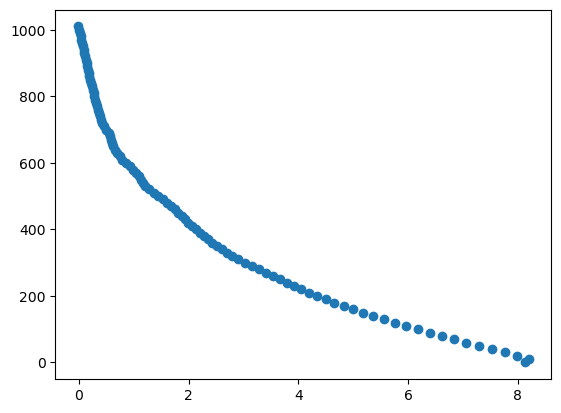

In [76]:
plt.scatter(x=iy3,y=new_x)

In [23]:
nc_file = xr.open_dataset(lis[i], engine="netcdf4", group = 'Data Fields')
corr = xr.open_dataset(lis[i], engine="netcdf4", group = 'Geolocation Fields')
nc_file.coords["lon"] = corr.Longitude
nc_file.coords["lat"] = corr.Latitude
nc_file.coords["qa"] = nc_file.FinalAlgorithmFlags
nc_file.coords["cf"] = nc_file.AMFCloudFraction
nc_file

<xarray.Dataset>
Dimensions:                 (nwavel: 3, spatial: 2048, image: 695, layer: 47)
Coordinates:
    lon                     (spatial, image) float32 ...
    lat                     (spatial, image) float32 ...
    qa                      (spatial, image) float32 ...
    cf                      (spatial, image) float32 ...
Dimensions without coordinates: nwavel, spatial, image, layer
Data variables: (12/18)
    AerosolOpticalDepth     (nwavel, spatial, image) float32 ...
    AirMassFactor           (spatial, image) float32 ...
    ClearAirMassFactor      (spatial, image) float32 ...
    ClearScatteringWeight   (layer, spatial, image) float32 ...
    DSCD                    (spatial, image) float32 ...
    AMFCloudFraction        (spatial, image) float32 ...
    ...                      ...
    FittingRMS              (spatial, image) float32 ...
    GasProfile              (layer, spatial, image) float32 ...
    Layer                   (layer, spatial, image) float32 ...
    FinalAlgorithmFlags     (spatial, image) float32 ...
    ScatteringWeight        (layer, spatial, image) float32 ...
    SingleScatteringAlbedo  (nwavel, spatial, image) float32 ...

In [39]:
str(lis[i])[37:41]

'0045'

In [40]:
df = nc_file[['Layer','ScatteringWeight']].to_dataframe()
df['Month'] = str(lis[i])[10:12]
df['Hour'] = str(lis[i])[37:39]
df

Layer  ScatteringWeight         lon        lat  \
layer spatial image                                                         
0     0       0      1001.333984          0.246759  144.002991  45.810127   
              1      1001.333984          0.246773  143.902496  45.806446   
              2      1001.333984          0.246787  143.802567  45.802780   
              3       999.346741          0.247320  143.702362  45.799061   
              4       999.346741          0.247331  143.602188  45.795452   
...                          ...               ...         ...        ...   
46    2047    690       0.025690          4.284127   91.713608  -5.931408   
              691       0.025690          4.296247   91.625595  -5.932653   
              692       0.025690          4.308482   91.537346  -5.933941   
              693       0.025690          4.320778   91.449181  -5.935152   
              694       0.025690          4.333259   91.360352  -5.936393   

                      qa   cf Month Hour  
layer spatial image                       
0     0       0      1.0  0.0    05   00  
              1      2.0  0.0    05   00  
              2      1.0  0.0    05   00  
              3      1.0  0.0    05   00  
              4      2.0  0.0    05   00  
...                  ...  ...   ...  ...  
46    2047    690   -1.0  0.0    05   00  
              691   -1.0  0.0    05   00  
              692   -1.0  0.0    05   00  
              693   -1.0  0.0    05   00  
              694   -1.0  0.0    05   00  

[66897920 rows x 8 columns]

In [44]:
dfT = df.reset_index().dropna()
dfT

,layer,spatial,image,Layer,ScatteringWeight,lon,lat,qa,cf,Month,Hour
0,0,0,0,1001.333984,0.246759,144.002991,45.810127,1.0,0.0,05,00
1,0,0,1,1001.333984,0.246773,143.902496,45.806446,2.0,0.0,05,00
2,0,0,2,1001.333984,0.246787,143.802567,45.802780,1.0,0.0,05,00
3,0,0,3,999.346741,0.247320,143.702362,45.799061,1.0,0.0,05,00
4,0,0,4,999.346741,0.247331,143.602188,45.795452,2.0,0.0,05,00
...,...,...,...,...,...,...,...,...,...,...,...
66897915,46,2047,690,0.025690,4.284127,91.713608,-5.931408,-1.0,0.0,05,00
66897916,46,2047,691,0.025690,4.296247,91.625595,-5.932653,-1.0,0.0,05,00
66897917,46,2047,692,0.025690,4.308482,91.537346,-5.933941,-1.0,0.0,05,00
66897918,46,2047,693,0.025690,4.320778,91.449181,-5.935152,-1.0,0.0,05,00


In [27]:
def matchGrid(lat, lon):
    lonX = round((lon-60)/0.625)*0.625+60
    latX = round((lat+11)/0.5)*0.5-11
    tp = (latX, lonX)
    return tp

In [45]:
lonX = []
latX = []
for lon in dfT['lon']:
    lonX.append(round((lon-60)/0.625)*0.625+60)
for lat in dfT['lat']:
    latX.append(round((lat+11)/0.5)*0.5-11)
dfT['lonX'] = lonX
dfT['latX'] = latX
dfT

,layer,spatial,image,Layer,ScatteringWeight,lon,lat,qa,cf,Month,Hour,lonX,latX
0,0,0,0,1001.333984,0.246759,144.002991,45.810127,1.0,0.0,05,00,143.750,46.0
1,0,0,1,1001.333984,0.246773,143.902496,45.806446,2.0,0.0,05,00,143.750,46.0
2,0,0,2,1001.333984,0.246787,143.802567,45.802780,1.0,0.0,05,00,143.750,46.0
3,0,0,3,999.346741,0.247320,143.702362,45.799061,1.0,0.0,05,00,143.750,46.0
4,0,0,4,999.346741,0.247331,143.602188,45.795452,2.0,0.0,05,00,143.750,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897915,46,2047,690,0.025690,4.284127,91.713608,-5.931408,-1.0,0.0,05,00,91.875,-6.0
66897916,46,2047,691,0.025690,4.296247,91.625595,-5.932653,-1.0,0.0,05,00,91.875,-6.0
66897917,46,2047,692,0.025690,4.308482,91.537346,-5.933941,-1.0,0.0,05,00,91.250,-6.0
66897918,46,2047,693,0.025690,4.320778,91.449181,-5.935152,-1.0,0.0,05,00,91.250,-6.0


In [46]:
dfT[['Layer','ScatteringWeight','lonX','latX','Month','Hour']].groupby(['Layer','lonX','latX','Month','Hour']).mean()

ScatteringWeight
Layer       lonX    latX Month Hour                  
0.025690    69.375  48.0 05    00            9.623082
                    48.5 05    00            9.700397
                    49.0 05    00            9.778780
                    49.5 05    00            9.842586
            70.000  45.5 05    00            9.088877
...                                               ...
1006.291931 140.000 28.5 05    00            0.416285
                    29.0 05    00            0.306294
            140.625 28.0 05    00            0.433694
                    28.5 05    00            0.432957
                    29.0 05    00            0.388882

[605487 rows x 1 columns]

In [8]:
nc_file['ScatteringWeight'].to_dataframe()

ScatteringWeight
layer spatial image                  
0     0       0              0.246759
              1              0.246773
              2              0.246787
              3              0.247320
              4              0.247331
...                               ...
46    2047    690            4.284127
              691            4.296247
              692            4.308482
              693            4.320778
              694            4.333259

[66897920 rows x 1 columns]